In [2]:
import train
import logging
import torch
from EfficientUnet import EfficientUnet
import importlib
from datasets import BasicDataset
import matplotlib.pyplot as plt
import random

In [3]:
from matplotlib.colors import ListedColormap

cmap = ListedColormap([[0.29411764705882354, 0.4392156862745098, 0.7333333333333333],
                        [0.5882352941176471, 0.7607843137254902, 0.8666666666666667],
                        [0.8901960784313725, 0.9647058823529412, 0.9764705882352941],
                        [0.9803921568627451, 0.8745098039215686, 0.4666666666666667],
                        [0.9607843137254902, 0.47058823529411764, 0.29411764705882354],
                        [0.8470588235294118, 0.1568627450980392, 0.1411764705882353]]
                            )

In [4]:
logging.basicConfig(level=logging.INFO, format='%(levelname)s: %(message)s')
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
logging.info(f'Using device {device}')
model = EfficientUnet(n_classes=6).to(device)

logging.info(f'Network:\n'
        f'\t{model.n_channels} input channels\n'
        f'\t{model.n_classes} output channels (classes)\n')


INFO: Using device cuda
INFO: Network:
	2 input channels
	6 output channels (classes)



In [5]:
train_dir = 'data/images/train'
train_mask_dir = 'data/annotations/train'
val_dir = 'data/images/val'
val_mask_dir = 'data/annotations/val'
test_dir = 'data/images/test'
test_mask_dir = 'data/annotations/test'
checkpoint_dir = 'checkpoints/'

In [6]:
test_dataset = BasicDataset(test_dir, test_mask_dir, augmentation=False)
# tese_loader = torch.utils.data.DataLoader(test_dataset, batch_size=16, shuffle=False, pin_memory=True)

INFO: Creating dataset with 400 examples
INFO: Scanning mask files to determine unique values
100%|██████████| 400/400 [00:00<00:00, 3486.10it/s]
INFO: Unique mask values: [0, 1, 2, 3, 4, 5]


In [7]:
importlib.reload(train)

BATCH_SIZE = 16
LEARNING_RATE = 5e-5
EPOCHS = 120
model = EfficientUnet(n_classes=6).to(device)
torch.cuda.empty_cache()

train.train_model(
    model=model,
    device=device,
    dir_img_train=train_dir,
    dir_mask_train=train_mask_dir,
    dir_img_val=val_dir,
    dir_mask_val=val_mask_dir,
    dir_checkpoint=checkpoint_dir,
    save_checkpoint=True,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    learning_rate=LEARNING_RATE,
    val_percent=0.1,
    augmentation=True,
    gradient_clipping=1.0,
)


INFO: Creating dataset with 992 examples
INFO: Scanning mask files to determine unique values
100%|██████████| 992/992 [00:00<00:00, 3179.62it/s]
INFO: Unique mask values: [0, 1, 2, 3, 4, 5]
INFO: Creating dataset with 110 examples
INFO: Scanning mask files to determine unique values
100%|██████████| 110/110 [00:00<00:00, 3709.33it/s]
INFO: Unique mask values: [0, 1, 2, 3, 4, 5]
INFO: Starting training:
        Epochs:          120
        Batch size:      16
        Learning rate:   5e-05
        Training size:   992
        Validation size: 110
        Checkpoints:     True
        Device:          cuda
    
Epoch 1/120: 100%|██████████| 992/992 [00:06<00:00, 345.98img/s, loss (batch)=0.926]INFO: IoU score: 0.469; F1 score: 0.385
INFO: Epoch finished ! IOU: 0.321
Epoch 1/120: 100%|██████████| 992/992 [00:07<00:00, 132.62img/s, loss (batch)=0.926]
INFO: Checkpoint 1 saved!


0.4691537618637085 0.3850941061973572 1.1448352336883545


Epoch 2/120: 100%|██████████| 992/992 [00:05<00:00, 336.64img/s, loss (batch)=0.731]INFO: IoU score: 0.664; F1 score: 0.606
INFO: Epoch finished ! IOU: 0.583
Epoch 2/120: 100%|██████████| 992/992 [00:06<00:00, 147.86img/s, loss (batch)=0.731]
INFO: Checkpoint 2 saved!


0.6636346578598022 0.6060011982917786 0.8328820466995239


Epoch 3/120: 100%|██████████| 992/992 [00:05<00:00, 339.93img/s, loss (batch)=0.652]INFO: IoU score: 0.735; F1 score: 0.684
INFO: Epoch finished ! IOU: 0.650
Epoch 3/120: 100%|██████████| 992/992 [00:06<00:00, 146.90img/s, loss (batch)=0.652]
INFO: Checkpoint 3 saved!


0.7347264885902405 0.6838401556015015 0.7634599208831787


Epoch 4/120: 100%|██████████| 992/992 [00:05<00:00, 337.86img/s, loss (batch)=0.616]INFO: IoU score: 0.769; F1 score: 0.723
INFO: Epoch finished ! IOU: 0.693
Epoch 4/120: 100%|██████████| 992/992 [00:06<00:00, 147.39img/s, loss (batch)=0.616]
INFO: Checkpoint 4 saved!


0.768659770488739 0.7228664755821228 0.6956127285957336


Epoch 5/120: 100%|██████████| 992/992 [00:05<00:00, 338.83img/s, loss (batch)=0.573]INFO: IoU score: 0.793; F1 score: 0.751
INFO: Epoch finished ! IOU: 0.717
Epoch 5/120: 100%|██████████| 992/992 [00:06<00:00, 147.00img/s, loss (batch)=0.573]
INFO: Checkpoint 5 saved!


0.7931572198867798 0.750569224357605 0.6280722618103027


Epoch 6/120: 100%|██████████| 992/992 [00:05<00:00, 339.20img/s, loss (batch)=0.52] INFO: IoU score: 0.812; F1 score: 0.767
INFO: Epoch finished ! IOU: 0.731
Epoch 6/120: 100%|██████████| 992/992 [00:06<00:00, 148.37img/s, loss (batch)=0.52]
INFO: Checkpoint 6 saved!


0.8120514750480652 0.7668441534042358 0.6014145612716675


Epoch 7/120: 100%|██████████| 992/992 [00:05<00:00, 337.67img/s, loss (batch)=0.426]INFO: IoU score: 0.835; F1 score: 0.789
INFO: Epoch finished ! IOU: 0.743
Epoch 7/120: 100%|██████████| 992/992 [00:06<00:00, 146.38img/s, loss (batch)=0.426]
INFO: Checkpoint 7 saved!


0.8347975611686707 0.7887786030769348 0.5003781914710999


Epoch 8/120: 100%|██████████| 992/992 [00:05<00:00, 340.19img/s, loss (batch)=0.462]INFO: IoU score: 0.858; F1 score: 0.812
INFO: Epoch finished ! IOU: 0.762
Epoch 8/120: 100%|██████████| 992/992 [00:06<00:00, 149.33img/s, loss (batch)=0.462]
INFO: Checkpoint 8 saved!


0.8578936457633972 0.8115431070327759 0.4493948221206665


Epoch 9/120: 100%|██████████| 992/992 [00:05<00:00, 339.47img/s, loss (batch)=0.394]INFO: IoU score: 0.873; F1 score: 0.828
INFO: Epoch finished ! IOU: 0.818
Epoch 9/120: 100%|██████████| 992/992 [00:06<00:00, 145.64img/s, loss (batch)=0.394]
INFO: Checkpoint 9 saved!


0.8729840517044067 0.8277860283851624 0.43387553095817566


Epoch 10/120: 100%|██████████| 992/992 [00:05<00:00, 338.32img/s, loss (batch)=0.364]INFO: IoU score: 0.887; F1 score: 0.845
INFO: Epoch finished ! IOU: 0.852
Epoch 10/120: 100%|██████████| 992/992 [00:06<00:00, 148.64img/s, loss (batch)=0.364]
INFO: Checkpoint 10 saved!


0.8873338103294373 0.8453838229179382 0.4032846689224243


Epoch 11/120: 100%|██████████| 992/992 [00:05<00:00, 337.66img/s, loss (batch)=0.35] INFO: IoU score: 0.882; F1 score: 0.843
INFO: Epoch finished ! IOU: 0.868
Epoch 11/120: 100%|██████████| 992/992 [00:06<00:00, 147.98img/s, loss (batch)=0.35]
INFO: Checkpoint 11 saved!


0.8822439312934875 0.8430249094963074 0.3804149031639099


Epoch 12/120: 100%|██████████| 992/992 [00:05<00:00, 339.50img/s, loss (batch)=0.333]INFO: IoU score: 0.888; F1 score: 0.849
INFO: Epoch finished ! IOU: 0.890
Epoch 12/120: 100%|██████████| 992/992 [00:06<00:00, 148.31img/s, loss (batch)=0.333]
INFO: Checkpoint 12 saved!


0.8880799412727356 0.8491889238357544 0.3640802204608917


Epoch 13/120: 100%|██████████| 992/992 [00:05<00:00, 337.81img/s, loss (batch)=0.307]INFO: IoU score: 0.882; F1 score: 0.845
INFO: Epoch finished ! IOU: 0.901
Epoch 13/120: 100%|██████████| 992/992 [00:06<00:00, 148.21img/s, loss (batch)=0.307]
INFO: Checkpoint 13 saved!


0.881779670715332 0.8452081680297852 0.34055817127227783


Epoch 14/120: 100%|██████████| 992/992 [00:05<00:00, 339.96img/s, loss (batch)=0.292]INFO: IoU score: 0.877; F1 score: 0.839
INFO: Epoch finished ! IOU: 0.914
Epoch 14/120: 100%|██████████| 992/992 [00:06<00:00, 148.12img/s, loss (batch)=0.292]
INFO: Checkpoint 14 saved!


0.8766556978225708 0.8393818736076355 0.3160165250301361


Epoch 15/120: 100%|██████████| 992/992 [00:05<00:00, 339.86img/s, loss (batch)=0.287]INFO: IoU score: 0.879; F1 score: 0.842
INFO: Epoch finished ! IOU: 0.912
Epoch 15/120: 100%|██████████| 992/992 [00:06<00:00, 147.72img/s, loss (batch)=0.287]
INFO: Checkpoint 15 saved!


0.8790512084960938 0.8419647216796875 0.2996346950531006


Epoch 16/120: 100%|██████████| 992/992 [00:05<00:00, 336.85img/s, loss (batch)=0.267]INFO: IoU score: 0.878; F1 score: 0.841
INFO: Epoch finished ! IOU: 0.919
Epoch 16/120: 100%|██████████| 992/992 [00:07<00:00, 140.16img/s, loss (batch)=0.267]
INFO: Checkpoint 16 saved!


0.8783600926399231 0.8412196636199951 0.280933678150177


Epoch 17/120: 100%|██████████| 992/992 [00:05<00:00, 340.31img/s, loss (batch)=0.237]INFO: IoU score: 0.899; F1 score: 0.863
INFO: Epoch finished ! IOU: 0.925
Epoch 17/120: 100%|██████████| 992/992 [00:06<00:00, 146.28img/s, loss (batch)=0.237]
INFO: Checkpoint 17 saved!


0.899451494216919 0.8626549243927002 0.26393818855285645


Epoch 18/120: 100%|██████████| 992/992 [00:05<00:00, 340.55img/s, loss (batch)=0.224]INFO: IoU score: 0.888; F1 score: 0.851
INFO: Epoch finished ! IOU: 0.924
Epoch 18/120: 100%|██████████| 992/992 [00:06<00:00, 147.34img/s, loss (batch)=0.224]
INFO: Checkpoint 18 saved!


0.8884181976318359 0.8513796925544739 0.2532283067703247


Epoch 19/120: 100%|██████████| 992/992 [00:05<00:00, 341.43img/s, loss (batch)=0.225]INFO: IoU score: 0.916; F1 score: 0.881
INFO: Epoch finished ! IOU: 0.928
Epoch 19/120: 100%|██████████| 992/992 [00:06<00:00, 147.64img/s, loss (batch)=0.225]
INFO: Checkpoint 19 saved!


0.9156687259674072 0.8811875581741333 0.23798076808452606


Epoch 20/120: 100%|██████████| 992/992 [00:05<00:00, 335.53img/s, loss (batch)=0.198]INFO: IoU score: 0.900; F1 score: 0.864
INFO: Epoch finished ! IOU: 0.926
Epoch 20/120: 100%|██████████| 992/992 [00:06<00:00, 147.75img/s, loss (batch)=0.198]
INFO: Checkpoint 20 saved!


0.9004026651382446 0.8635536432266235 0.22953113913536072


Epoch 21/120: 100%|██████████| 992/992 [00:05<00:00, 340.31img/s, loss (batch)=0.207]INFO: IoU score: 0.928; F1 score: 0.891
INFO: Epoch finished ! IOU: 0.935
Epoch 21/120: 100%|██████████| 992/992 [00:06<00:00, 146.59img/s, loss (batch)=0.207]
INFO: Checkpoint 21 saved!


0.9275363087654114 0.8912417888641357 0.2189953625202179


Epoch 22/120: 100%|██████████| 992/992 [00:05<00:00, 339.23img/s, loss (batch)=0.182]INFO: IoU score: 0.923; F1 score: 0.888
INFO: Epoch finished ! IOU: 0.932
Epoch 22/120: 100%|██████████| 992/992 [00:06<00:00, 149.96img/s, loss (batch)=0.182]
INFO: Checkpoint 22 saved!


0.9228124618530273 0.8877200484275818 0.20883619785308838


Epoch 23/120: 100%|██████████| 992/992 [00:05<00:00, 340.44img/s, loss (batch)=0.18] INFO: IoU score: 0.922; F1 score: 0.885
INFO: Epoch finished ! IOU: 0.934
Epoch 23/120: 100%|██████████| 992/992 [00:06<00:00, 148.09img/s, loss (batch)=0.18]
INFO: Checkpoint 23 saved!


0.9217138290405273 0.8849729895591736 0.19649562239646912


Epoch 24/120: 100%|██████████| 992/992 [00:05<00:00, 338.27img/s, loss (batch)=0.176]INFO: IoU score: 0.929; F1 score: 0.895
INFO: Epoch finished ! IOU: 0.933
Epoch 24/120: 100%|██████████| 992/992 [00:06<00:00, 148.55img/s, loss (batch)=0.176]
INFO: Checkpoint 24 saved!


0.9287576675415039 0.8948354721069336 0.18904279172420502


Epoch 25/120: 100%|██████████| 992/992 [00:05<00:00, 342.30img/s, loss (batch)=0.182]INFO: IoU score: 0.932; F1 score: 0.898
INFO: Epoch finished ! IOU: 0.933
Epoch 25/120: 100%|██████████| 992/992 [00:06<00:00, 149.20img/s, loss (batch)=0.182]
INFO: Checkpoint 25 saved!


0.9323532581329346 0.8982474207878113 0.18205031752586365


Epoch 26/120: 100%|██████████| 992/992 [00:05<00:00, 341.62img/s, loss (batch)=0.157]INFO: IoU score: 0.933; F1 score: 0.899
INFO: Epoch finished ! IOU: 0.937
Epoch 26/120: 100%|██████████| 992/992 [00:06<00:00, 148.23img/s, loss (batch)=0.157]
INFO: Checkpoint 26 saved!


0.9334574341773987 0.8994441628456116 0.1734118014574051


Epoch 27/120: 100%|██████████| 992/992 [00:05<00:00, 337.84img/s, loss (batch)=0.152]INFO: IoU score: 0.938; F1 score: 0.904
INFO: Epoch finished ! IOU: 0.939
Epoch 27/120: 100%|██████████| 992/992 [00:06<00:00, 148.41img/s, loss (batch)=0.152]
INFO: Checkpoint 27 saved!


0.9377303719520569 0.9036122560501099 0.16677357256412506


Epoch 28/120: 100%|██████████| 992/992 [00:05<00:00, 341.57img/s, loss (batch)=0.149]INFO: IoU score: 0.934; F1 score: 0.900
INFO: Epoch finished ! IOU: 0.940
Epoch 28/120: 100%|██████████| 992/992 [00:06<00:00, 148.83img/s, loss (batch)=0.149]
INFO: Checkpoint 28 saved!


0.9337265491485596 0.8997715711593628 0.15871934592723846


Epoch 29/120: 100%|██████████| 992/992 [00:05<00:00, 341.75img/s, loss (batch)=0.142]INFO: IoU score: 0.937; F1 score: 0.902
INFO: Epoch finished ! IOU: 0.939
Epoch 29/120: 100%|██████████| 992/992 [00:06<00:00, 147.00img/s, loss (batch)=0.142]
INFO: Checkpoint 29 saved!


0.9372850060462952 0.9022789597511292 0.15056271851062775


Epoch 30/120: 100%|██████████| 992/992 [00:05<00:00, 340.57img/s, loss (batch)=0.13] INFO: IoU score: 0.940; F1 score: 0.906
INFO: Epoch finished ! IOU: 0.938
Epoch 30/120: 100%|██████████| 992/992 [00:06<00:00, 149.22img/s, loss (batch)=0.13]
INFO: Checkpoint 30 saved!


0.9399003386497498 0.9055629968643188 0.14344722032546997


Epoch 31/120: 100%|██████████| 992/992 [00:05<00:00, 339.18img/s, loss (batch)=0.123]INFO: IoU score: 0.940; F1 score: 0.907
INFO: Epoch finished ! IOU: 0.942
Epoch 31/120: 100%|██████████| 992/992 [00:06<00:00, 147.21img/s, loss (batch)=0.123]
INFO: Checkpoint 31 saved!


0.9403308629989624 0.9066207408905029 0.14185123145580292


Epoch 32/120: 100%|██████████| 992/992 [00:05<00:00, 337.25img/s, loss (batch)=0.125]INFO: IoU score: 0.941; F1 score: 0.907
INFO: Epoch finished ! IOU: 0.940
Epoch 32/120: 100%|██████████| 992/992 [00:06<00:00, 148.08img/s, loss (batch)=0.125]
INFO: Checkpoint 32 saved!


0.9406914710998535 0.906901478767395 0.1384717971086502


Epoch 33/120: 100%|██████████| 992/992 [00:05<00:00, 339.45img/s, loss (batch)=0.123]INFO: IoU score: 0.935; F1 score: 0.901
INFO: Epoch finished ! IOU: 0.940
Epoch 33/120: 100%|██████████| 992/992 [00:06<00:00, 143.63img/s, loss (batch)=0.123]
INFO: Checkpoint 33 saved!


0.9345737099647522 0.9008933305740356 0.13604101538658142


Epoch 34/120: 100%|██████████| 992/992 [00:05<00:00, 340.57img/s, loss (batch)=0.109]INFO: IoU score: 0.940; F1 score: 0.907
INFO: Epoch finished ! IOU: 0.940
Epoch 34/120: 100%|██████████| 992/992 [00:06<00:00, 147.24img/s, loss (batch)=0.109]
INFO: Checkpoint 34 saved!


0.9400128722190857 0.906865119934082 0.12829069793224335


Epoch 35/120: 100%|██████████| 992/992 [00:05<00:00, 332.41img/s, loss (batch)=0.112]INFO: IoU score: 0.939; F1 score: 0.905
INFO: Epoch finished ! IOU: 0.945
Epoch 35/120: 100%|██████████| 992/992 [00:06<00:00, 142.95img/s, loss (batch)=0.112]
INFO: Checkpoint 35 saved!


0.939136266708374 0.9049501419067383 0.1226947009563446


Epoch 36/120: 100%|██████████| 992/992 [00:05<00:00, 336.87img/s, loss (batch)=0.101] INFO: IoU score: 0.939; F1 score: 0.906
INFO: Epoch finished ! IOU: 0.943
Epoch 36/120: 100%|██████████| 992/992 [00:06<00:00, 144.51img/s, loss (batch)=0.101]
INFO: Checkpoint 36 saved!


0.9388687014579773 0.9064007997512817 0.12274765968322754


Epoch 37/120: 100%|██████████| 992/992 [00:05<00:00, 336.61img/s, loss (batch)=0.0995]INFO: IoU score: 0.945; F1 score: 0.912
INFO: Epoch finished ! IOU: 0.947
Epoch 37/120: 100%|██████████| 992/992 [00:07<00:00, 141.26img/s, loss (batch)=0.0995]
INFO: Checkpoint 37 saved!


0.9449766278266907 0.9119760990142822 0.11498698592185974


Epoch 38/120: 100%|██████████| 992/992 [00:05<00:00, 337.74img/s, loss (batch)=0.0964]INFO: IoU score: 0.939; F1 score: 0.905
INFO: Epoch finished ! IOU: 0.945
Epoch 38/120: 100%|██████████| 992/992 [00:06<00:00, 145.67img/s, loss (batch)=0.0964]
INFO: Checkpoint 38 saved!


0.9389647245407104 0.905186653137207 0.1114029660820961


Epoch 39/120: 100%|██████████| 992/992 [00:05<00:00, 338.40img/s, loss (batch)=0.0863]INFO: IoU score: 0.940; F1 score: 0.908
INFO: Epoch finished ! IOU: 0.948
Epoch 39/120: 100%|██████████| 992/992 [00:06<00:00, 143.59img/s, loss (batch)=0.0863]
INFO: Checkpoint 39 saved!


0.9400335550308228 0.9076273441314697 0.10568086057901382


Epoch 40/120: 100%|██████████| 992/992 [00:05<00:00, 337.14img/s, loss (batch)=0.0886]INFO: IoU score: 0.935; F1 score: 0.901
INFO: Epoch finished ! IOU: 0.942
Epoch 40/120: 100%|██████████| 992/992 [00:06<00:00, 146.25img/s, loss (batch)=0.0886]
INFO: Checkpoint 40 saved!


0.935352623462677 0.901465117931366 0.10813340544700623


Epoch 41/120: 100%|██████████| 992/992 [00:05<00:00, 337.96img/s, loss (batch)=0.0872]INFO: IoU score: 0.939; F1 score: 0.905
INFO: Epoch finished ! IOU: 0.945
Epoch 41/120: 100%|██████████| 992/992 [00:06<00:00, 147.59img/s, loss (batch)=0.0872]
INFO: Checkpoint 41 saved!


0.9386749267578125 0.9051403403282166 0.10070226341485977


Epoch 42/120: 100%|██████████| 992/992 [00:05<00:00, 339.22img/s, loss (batch)=0.083] INFO: IoU score: 0.943; F1 score: 0.909
INFO: Epoch finished ! IOU: 0.943
Epoch 42/120: 100%|██████████| 992/992 [00:06<00:00, 147.53img/s, loss (batch)=0.083]
INFO: Checkpoint 42 saved!


0.9425803422927856 0.909174382686615 0.09540563821792603


Epoch 43/120: 100%|██████████| 992/992 [00:05<00:00, 336.19img/s, loss (batch)=0.0874]INFO: IoU score: 0.946; F1 score: 0.914
INFO: Epoch finished ! IOU: 0.947
Epoch 43/120: 100%|██████████| 992/992 [00:06<00:00, 147.20img/s, loss (batch)=0.0874]
INFO: Checkpoint 43 saved!


0.9459038972854614 0.9138494729995728 0.09402114897966385


Epoch 44/120: 100%|██████████| 992/992 [00:05<00:00, 341.96img/s, loss (batch)=0.0767]INFO: IoU score: 0.946; F1 score: 0.913
INFO: Epoch finished ! IOU: 0.948
Epoch 44/120: 100%|██████████| 992/992 [00:06<00:00, 146.33img/s, loss (batch)=0.0767]
INFO: Checkpoint 44 saved!


0.9459769129753113 0.9131374359130859 0.09188205748796463


Epoch 45/120: 100%|██████████| 992/992 [00:05<00:00, 339.59img/s, loss (batch)=0.072] INFO: IoU score: 0.948; F1 score: 0.916
INFO: Epoch finished ! IOU: 0.950
Epoch 45/120: 100%|██████████| 992/992 [00:06<00:00, 148.07img/s, loss (batch)=0.072]
INFO: Checkpoint 45 saved!


0.9477699398994446 0.9159632325172424 0.08977540582418442


Epoch 46/120: 100%|██████████| 992/992 [00:05<00:00, 340.12img/s, loss (batch)=0.0742]INFO: IoU score: 0.946; F1 score: 0.914
INFO: Epoch finished ! IOU: 0.948
Epoch 46/120: 100%|██████████| 992/992 [00:06<00:00, 148.76img/s, loss (batch)=0.0742]
INFO: Checkpoint 46 saved!


0.9457349181175232 0.9136000871658325 0.08938103169202805


Epoch 47/120: 100%|██████████| 992/992 [00:05<00:00, 337.43img/s, loss (batch)=0.0696]INFO: IoU score: 0.938; F1 score: 0.904
INFO: Epoch finished ! IOU: 0.944
Epoch 47/120: 100%|██████████| 992/992 [00:06<00:00, 147.90img/s, loss (batch)=0.0696]
INFO: Checkpoint 47 saved!


0.9376081824302673 0.9035552144050598 0.09080681949853897


Epoch 48/120: 100%|██████████| 992/992 [00:05<00:00, 337.62img/s, loss (batch)=0.0712]INFO: IoU score: 0.935; F1 score: 0.901
INFO: Epoch finished ! IOU: 0.947
Epoch 48/120: 100%|██████████| 992/992 [00:06<00:00, 148.57img/s, loss (batch)=0.0712]
INFO: Checkpoint 48 saved!


0.9353750944137573 0.9014924168586731 0.089114710688591


Epoch 49/120: 100%|██████████| 992/992 [00:05<00:00, 339.02img/s, loss (batch)=0.0728]INFO: IoU score: 0.939; F1 score: 0.906
INFO: Epoch finished ! IOU: 0.948
Epoch 49/120: 100%|██████████| 992/992 [00:06<00:00, 149.02img/s, loss (batch)=0.0728]
INFO: Checkpoint 49 saved!


0.9386373162269592 0.905887246131897 0.08002530038356781


Epoch 50/120: 100%|██████████| 992/992 [00:05<00:00, 338.14img/s, loss (batch)=0.0642]INFO: IoU score: 0.946; F1 score: 0.914
INFO: Epoch finished ! IOU: 0.951
Epoch 50/120: 100%|██████████| 992/992 [00:06<00:00, 147.72img/s, loss (batch)=0.0642]
INFO: Checkpoint 50 saved!


0.9461053609848022 0.9144181609153748 0.07629220932722092


Epoch 51/120: 100%|██████████| 992/992 [00:05<00:00, 339.27img/s, loss (batch)=0.06]  INFO: IoU score: 0.945; F1 score: 0.913
INFO: Epoch finished ! IOU: 0.948
Epoch 51/120: 100%|██████████| 992/992 [00:06<00:00, 146.36img/s, loss (batch)=0.06]
INFO: Checkpoint 51 saved!


0.9450088739395142 0.912983238697052 0.07649733126163483


Epoch 52/120: 100%|██████████| 992/992 [00:05<00:00, 337.77img/s, loss (batch)=0.0625]INFO: IoU score: 0.948; F1 score: 0.917
INFO: Epoch finished ! IOU: 0.949
Epoch 52/120: 100%|██████████| 992/992 [00:06<00:00, 148.30img/s, loss (batch)=0.0625]
INFO: Checkpoint 52 saved!


0.9484103918075562 0.9167224168777466 0.07517101615667343


Epoch 53/120: 100%|██████████| 992/992 [00:05<00:00, 336.54img/s, loss (batch)=0.0641]INFO: IoU score: 0.947; F1 score: 0.916
INFO: Epoch finished ! IOU: 0.950
Epoch 53/120: 100%|██████████| 992/992 [00:06<00:00, 147.35img/s, loss (batch)=0.0641]
INFO: Checkpoint 53 saved!


0.9473108649253845 0.9155781269073486 0.07506979256868362


Epoch 54/120: 100%|██████████| 992/992 [00:05<00:00, 337.38img/s, loss (batch)=0.0599]INFO: IoU score: 0.948; F1 score: 0.916
INFO: Epoch finished ! IOU: 0.952
Epoch 54/120: 100%|██████████| 992/992 [00:06<00:00, 146.34img/s, loss (batch)=0.0599]
INFO: Checkpoint 54 saved!


0.9480388760566711 0.9164374470710754 0.07389897853136063


Epoch 55/120: 100%|██████████| 992/992 [00:05<00:00, 336.44img/s, loss (batch)=0.0568]INFO: IoU score: 0.947; F1 score: 0.916
INFO: Epoch finished ! IOU: 0.952
Epoch 55/120: 100%|██████████| 992/992 [00:06<00:00, 146.83img/s, loss (batch)=0.0568]
INFO: Checkpoint 55 saved!


0.9474123120307922 0.9156532883644104 0.07400915771722794


Epoch 56/120: 100%|██████████| 992/992 [00:05<00:00, 337.54img/s, loss (batch)=0.0657]INFO: IoU score: 0.949; F1 score: 0.917
INFO: Epoch finished ! IOU: 0.951
Epoch 56/120: 100%|██████████| 992/992 [00:06<00:00, 146.81img/s, loss (batch)=0.0657]
INFO: Checkpoint 56 saved!


0.9491788148880005 0.9173623323440552 0.07372069358825684


Epoch 57/120: 100%|██████████| 992/992 [00:05<00:00, 339.55img/s, loss (batch)=0.0617]INFO: IoU score: 0.948; F1 score: 0.917
INFO: Epoch finished ! IOU: 0.952
Epoch 57/120: 100%|██████████| 992/992 [00:06<00:00, 146.32img/s, loss (batch)=0.0617]
INFO: Checkpoint 57 saved!


0.9482133984565735 0.9167760610580444 0.07341491430997849


Epoch 58/120: 100%|██████████| 992/992 [00:05<00:00, 335.66img/s, loss (batch)=0.0591]INFO: IoU score: 0.949; F1 score: 0.917
INFO: Epoch finished ! IOU: 0.950
Epoch 58/120: 100%|██████████| 992/992 [00:06<00:00, 147.58img/s, loss (batch)=0.0591]
INFO: Checkpoint 58 saved!


0.9491080641746521 0.9174180626869202 0.0731598511338234


Epoch 59/120: 100%|██████████| 992/992 [00:05<00:00, 339.80img/s, loss (batch)=0.0579]INFO: IoU score: 0.948; F1 score: 0.917
INFO: Epoch finished ! IOU: 0.948
Epoch 59/120: 100%|██████████| 992/992 [00:06<00:00, 145.12img/s, loss (batch)=0.0579]
INFO: Checkpoint 59 saved!


0.9481316208839417 0.9166329503059387 0.0733056515455246


Epoch 60/120: 100%|██████████| 992/992 [00:05<00:00, 339.58img/s, loss (batch)=0.0596]INFO: IoU score: 0.949; F1 score: 0.918
INFO: Epoch finished ! IOU: 0.946
Epoch 60/120: 100%|██████████| 992/992 [00:06<00:00, 147.74img/s, loss (batch)=0.0596]
INFO: Checkpoint 60 saved!


0.9493443369865417 0.9177860021591187 0.07418830692768097


Epoch 61/120: 100%|██████████| 992/992 [00:05<00:00, 336.71img/s, loss (batch)=0.0595]INFO: IoU score: 0.948; F1 score: 0.916
INFO: Epoch finished ! IOU: 0.950
Epoch 61/120: 100%|██████████| 992/992 [00:06<00:00, 146.82img/s, loss (batch)=0.0595]
INFO: Checkpoint 61 saved!


0.9477666616439819 0.9161146879196167 0.07254493236541748


Epoch 62/120: 100%|██████████| 992/992 [00:05<00:00, 334.75img/s, loss (batch)=0.0626]INFO: IoU score: 0.949; F1 score: 0.917
INFO: Epoch finished ! IOU: 0.952
Epoch 62/120: 100%|██████████| 992/992 [00:06<00:00, 147.45img/s, loss (batch)=0.0626]
INFO: Checkpoint 62 saved!


0.9488707780838013 0.9170916080474854 0.07361769676208496


Epoch 63/120: 100%|██████████| 992/992 [00:05<00:00, 334.74img/s, loss (batch)=0.0581]INFO: IoU score: 0.950; F1 score: 0.918
INFO: Epoch finished ! IOU: 0.951
Epoch 63/120: 100%|██████████| 992/992 [00:06<00:00, 145.82img/s, loss (batch)=0.0581]
INFO: Checkpoint 63 saved!


0.9497199654579163 0.9181361794471741 0.0723186507821083


Epoch 64/120: 100%|██████████| 992/992 [00:05<00:00, 335.58img/s, loss (batch)=0.0639]INFO: IoU score: 0.948; F1 score: 0.917
INFO: Epoch finished ! IOU: 0.951
Epoch 64/120: 100%|██████████| 992/992 [00:06<00:00, 147.74img/s, loss (batch)=0.0639]
INFO: Checkpoint 64 saved!


0.9483213424682617 0.9169405102729797 0.07205141335725784


Epoch 65/120: 100%|██████████| 992/992 [00:05<00:00, 335.43img/s, loss (batch)=0.0588]INFO: IoU score: 0.948; F1 score: 0.916
INFO: Epoch finished ! IOU: 0.952
Epoch 65/120: 100%|██████████| 992/992 [00:06<00:00, 146.49img/s, loss (batch)=0.0588]
INFO: Checkpoint 65 saved!


0.9476384520530701 0.9159526824951172 0.07243306934833527


Epoch 66/120: 100%|██████████| 992/992 [00:05<00:00, 336.01img/s, loss (batch)=0.0682]INFO: IoU score: 0.950; F1 score: 0.918
INFO: Epoch finished ! IOU: 0.950
Epoch 66/120: 100%|██████████| 992/992 [00:06<00:00, 146.89img/s, loss (batch)=0.0682]
INFO: Checkpoint 66 saved!


0.9498045444488525 0.9182845950126648 0.07261347025632858


Epoch 67/120: 100%|██████████| 992/992 [00:05<00:00, 335.42img/s, loss (batch)=0.0616]INFO: IoU score: 0.951; F1 score: 0.920
INFO: Epoch finished ! IOU: 0.954
Epoch 67/120: 100%|██████████| 992/992 [00:06<00:00, 145.68img/s, loss (batch)=0.0616]
INFO: Checkpoint 67 saved!


0.950731098651886 0.9195863008499146 0.07162810117006302


Epoch 68/120: 100%|██████████| 992/992 [00:05<00:00, 354.20img/s, loss (batch)=0.0605]INFO: IoU score: 0.950; F1 score: 0.918
INFO: Epoch finished ! IOU: 0.950
Epoch 68/120: 100%|██████████| 992/992 [00:06<00:00, 149.67img/s, loss (batch)=0.0605]
INFO: Checkpoint 68 saved!


0.9497737288475037 0.9183712601661682 0.0719892829656601


Epoch 69/120: 100%|██████████| 992/992 [00:05<00:00, 335.31img/s, loss (batch)=0.0614]INFO: IoU score: 0.949; F1 score: 0.917
INFO: Epoch finished ! IOU: 0.952
Epoch 69/120: 100%|██████████| 992/992 [00:06<00:00, 147.29img/s, loss (batch)=0.0614]
INFO: Checkpoint 69 saved!


0.9488752484321594 0.9170840978622437 0.07189913094043732


Epoch 70/120: 100%|██████████| 992/992 [00:05<00:00, 354.06img/s, loss (batch)=0.0577]INFO: IoU score: 0.948; F1 score: 0.917
INFO: Epoch finished ! IOU: 0.953
Epoch 70/120: 100%|██████████| 992/992 [00:06<00:00, 149.54img/s, loss (batch)=0.0577]
INFO: Checkpoint 70 saved!


0.948112964630127 0.9167752265930176 0.07096458971500397


Epoch 71/120: 100%|██████████| 992/992 [00:05<00:00, 337.38img/s, loss (batch)=0.0585]INFO: IoU score: 0.949; F1 score: 0.918
INFO: Epoch finished ! IOU: 0.952
Epoch 71/120: 100%|██████████| 992/992 [00:06<00:00, 148.04img/s, loss (batch)=0.0585]
INFO: Checkpoint 71 saved!


0.9490164518356323 0.9178630113601685 0.07096316665410995


Epoch 72/120: 100%|██████████| 992/992 [00:05<00:00, 354.73img/s, loss (batch)=0.0582]INFO: IoU score: 0.949; F1 score: 0.918
INFO: Epoch finished ! IOU: 0.954
Epoch 72/120: 100%|██████████| 992/992 [00:06<00:00, 148.90img/s, loss (batch)=0.0582]
INFO: Checkpoint 72 saved!


0.9488849639892578 0.9177389144897461 0.07091014087200165


Epoch 73/120: 100%|██████████| 992/992 [00:05<00:00, 335.74img/s, loss (batch)=0.0583]INFO: IoU score: 0.948; F1 score: 0.916
INFO: Epoch finished ! IOU: 0.953
Epoch 73/120: 100%|██████████| 992/992 [00:06<00:00, 145.65img/s, loss (batch)=0.0583]
INFO: Checkpoint 73 saved!


0.9478548169136047 0.9162599444389343 0.07003224641084671


Epoch 74/120: 100%|██████████| 992/992 [00:05<00:00, 336.53img/s, loss (batch)=0.054] INFO: IoU score: 0.948; F1 score: 0.916
INFO: Epoch finished ! IOU: 0.951
Epoch 74/120: 100%|██████████| 992/992 [00:06<00:00, 146.51img/s, loss (batch)=0.054]
INFO: Checkpoint 74 saved!


0.9478306770324707 0.9162713885307312 0.07074089348316193


Epoch 75/120: 100%|██████████| 992/992 [00:05<00:00, 346.31img/s, loss (batch)=0.0582]INFO: IoU score: 0.948; F1 score: 0.916
INFO: Epoch finished ! IOU: 0.954
Epoch 75/120: 100%|██████████| 992/992 [00:06<00:00, 148.05img/s, loss (batch)=0.0582]
INFO: Checkpoint 75 saved!


0.9477635025978088 0.9161431193351746 0.0705501139163971


Epoch 76/120: 100%|██████████| 992/992 [00:05<00:00, 335.28img/s, loss (batch)=0.0551]INFO: IoU score: 0.948; F1 score: 0.917
INFO: Epoch finished ! IOU: 0.950
Epoch 76/120: 100%|██████████| 992/992 [00:06<00:00, 146.68img/s, loss (batch)=0.0551]
INFO: Checkpoint 76 saved!


0.9482306838035583 0.9168078303337097 0.06996525079011917


Epoch 77/120: 100%|██████████| 992/992 [00:05<00:00, 339.54img/s, loss (batch)=0.0609]INFO: IoU score: 0.948; F1 score: 0.917
INFO: Epoch finished ! IOU: 0.949
Epoch 77/120: 100%|██████████| 992/992 [00:06<00:00, 148.43img/s, loss (batch)=0.0609]
INFO: Checkpoint 77 saved!


0.9484237432479858 0.9170727729797363 0.07018697261810303


Epoch 78/120: 100%|██████████| 992/992 [00:05<00:00, 335.36img/s, loss (batch)=0.0563]INFO: IoU score: 0.950; F1 score: 0.919
INFO: Epoch finished ! IOU: 0.951
Epoch 78/120: 100%|██████████| 992/992 [00:06<00:00, 146.05img/s, loss (batch)=0.0563]
INFO: Checkpoint 78 saved!


0.9500410556793213 0.9186353087425232 0.07060575485229492


Epoch 79/120: 100%|██████████| 992/992 [00:05<00:00, 345.92img/s, loss (batch)=0.0627]INFO: IoU score: 0.950; F1 score: 0.919
INFO: Epoch finished ! IOU: 0.953
Epoch 79/120: 100%|██████████| 992/992 [00:06<00:00, 147.53img/s, loss (batch)=0.0627]
INFO: Checkpoint 79 saved!


0.9503287076950073 0.9190362691879272 0.07055280357599258


Epoch 80/120: 100%|██████████| 992/992 [00:05<00:00, 335.90img/s, loss (batch)=0.0569]INFO: IoU score: 0.949; F1 score: 0.917
INFO: Epoch finished ! IOU: 0.952
Epoch 80/120: 100%|██████████| 992/992 [00:06<00:00, 146.01img/s, loss (batch)=0.0569]
INFO: Checkpoint 80 saved!


0.9485883712768555 0.9173009991645813 0.06985830515623093


Epoch 81/120: 100%|██████████| 992/992 [00:05<00:00, 354.92img/s, loss (batch)=0.0557]INFO: IoU score: 0.949; F1 score: 0.918
INFO: Epoch finished ! IOU: 0.950
Epoch 81/120: 100%|██████████| 992/992 [00:06<00:00, 148.29img/s, loss (batch)=0.0557]
INFO: Checkpoint 81 saved!


0.9489520788192749 0.9178061485290527 0.06934378296136856


Epoch 82/120: 100%|██████████| 992/992 [00:05<00:00, 336.77img/s, loss (batch)=0.0581]INFO: IoU score: 0.950; F1 score: 0.919
INFO: Epoch finished ! IOU: 0.954
Epoch 82/120: 100%|██████████| 992/992 [00:06<00:00, 146.79img/s, loss (batch)=0.0581]
INFO: Checkpoint 82 saved!


0.9500862956047058 0.9186688661575317 0.0704507902264595


Epoch 83/120: 100%|██████████| 992/992 [00:05<00:00, 345.22img/s, loss (batch)=0.0556]INFO: IoU score: 0.948; F1 score: 0.917
INFO: Epoch finished ! IOU: 0.948
Epoch 83/120: 100%|██████████| 992/992 [00:07<00:00, 137.46img/s, loss (batch)=0.0556]
INFO: Checkpoint 83 saved!


0.9480906128883362 0.9166397452354431 0.07054297626018524


Epoch 84/120: 100%|██████████| 992/992 [00:05<00:00, 337.04img/s, loss (batch)=0.06]  INFO: IoU score: 0.948; F1 score: 0.917
INFO: Epoch finished ! IOU: 0.953
Epoch 84/120: 100%|██████████| 992/992 [00:06<00:00, 147.10img/s, loss (batch)=0.06]
INFO: Checkpoint 84 saved!


0.9482211470603943 0.9168285131454468 0.07017092406749725


Epoch 85/120: 100%|██████████| 992/992 [00:05<00:00, 337.45img/s, loss (batch)=0.0591]INFO: IoU score: 0.950; F1 score: 0.919
INFO: Epoch finished ! IOU: 0.950
Epoch 85/120: 100%|██████████| 992/992 [00:06<00:00, 145.92img/s, loss (batch)=0.0591]
INFO: Checkpoint 85 saved!


0.9501639604568481 0.918812096118927 0.07049034535884857


Epoch 86/120: 100%|██████████| 992/992 [00:05<00:00, 338.65img/s, loss (batch)=0.0594]INFO: IoU score: 0.950; F1 score: 0.918
INFO: Epoch finished ! IOU: 0.950
Epoch 86/120: 100%|██████████| 992/992 [00:06<00:00, 147.90img/s, loss (batch)=0.0594]
INFO: Checkpoint 86 saved!


0.9497420787811279 0.918207585811615 0.07042144984006882


Epoch 87/120: 100%|██████████| 992/992 [00:05<00:00, 336.49img/s, loss (batch)=0.0595]INFO: IoU score: 0.950; F1 score: 0.919
INFO: Epoch finished ! IOU: 0.953
Epoch 87/120: 100%|██████████| 992/992 [00:06<00:00, 146.51img/s, loss (batch)=0.0595]
INFO: Checkpoint 87 saved!


0.9502633213996887 0.9189072251319885 0.07021383196115494


Epoch 88/120: 100%|██████████| 992/992 [00:05<00:00, 334.80img/s, loss (batch)=0.0552]INFO: IoU score: 0.950; F1 score: 0.919
INFO: Epoch finished ! IOU: 0.951
Epoch 88/120: 100%|██████████| 992/992 [00:06<00:00, 147.80img/s, loss (batch)=0.0552]
INFO: Checkpoint 88 saved!


0.9500616192817688 0.9186601638793945 0.07030776143074036


Epoch 89/120: 100%|██████████| 992/992 [00:05<00:00, 337.41img/s, loss (batch)=0.0568]INFO: IoU score: 0.948; F1 score: 0.917
INFO: Epoch finished ! IOU: 0.948
Epoch 89/120: 100%|██████████| 992/992 [00:06<00:00, 146.85img/s, loss (batch)=0.0568]
INFO: Checkpoint 89 saved!


0.9483342170715332 0.9169329404830933 0.07003216445446014


Epoch 90/120: 100%|██████████| 992/992 [00:05<00:00, 334.65img/s, loss (batch)=0.0567]INFO: IoU score: 0.950; F1 score: 0.919
INFO: Epoch finished ! IOU: 0.952
Epoch 90/120: 100%|██████████| 992/992 [00:06<00:00, 147.01img/s, loss (batch)=0.0567]
INFO: Checkpoint 90 saved!


0.9500443339347839 0.9186652302742004 0.07081683725118637


Epoch 91/120: 100%|██████████| 992/992 [00:05<00:00, 337.21img/s, loss (batch)=0.0555]INFO: IoU score: 0.948; F1 score: 0.917
INFO: Epoch finished ! IOU: 0.954
Epoch 91/120: 100%|██████████| 992/992 [00:06<00:00, 146.42img/s, loss (batch)=0.0555]
INFO: Checkpoint 91 saved!


0.9481553435325623 0.9166907072067261 0.07032472640275955


Epoch 92/120: 100%|██████████| 992/992 [00:05<00:00, 338.34img/s, loss (batch)=0.0573]INFO: IoU score: 0.950; F1 score: 0.919
INFO: Epoch finished ! IOU: 0.953
Epoch 92/120: 100%|██████████| 992/992 [00:06<00:00, 148.03img/s, loss (batch)=0.0573]
INFO: Checkpoint 92 saved!


0.9501577615737915 0.9187813401222229 0.07030627131462097


Epoch 93/120: 100%|██████████| 992/992 [00:05<00:00, 334.78img/s, loss (batch)=0.0597]INFO: IoU score: 0.949; F1 score: 0.917
INFO: Epoch finished ! IOU: 0.952
Epoch 93/120: 100%|██████████| 992/992 [00:06<00:00, 146.36img/s, loss (batch)=0.0597]
INFO: Checkpoint 93 saved!


0.9485037922859192 0.9171809554100037 0.07008856534957886


Epoch 94/120: 100%|██████████| 992/992 [00:05<00:00, 335.20img/s, loss (batch)=0.0613]INFO: IoU score: 0.949; F1 score: 0.917
INFO: Epoch finished ! IOU: 0.950
Epoch 94/120: 100%|██████████| 992/992 [00:06<00:00, 148.17img/s, loss (batch)=0.0613]
INFO: Checkpoint 94 saved!


0.9486586451530457 0.917400598526001 0.06994999200105667


Epoch 95/120: 100%|██████████| 992/992 [00:05<00:00, 335.93img/s, loss (batch)=0.0573]INFO: IoU score: 0.950; F1 score: 0.919
INFO: Epoch finished ! IOU: 0.952
Epoch 95/120: 100%|██████████| 992/992 [00:06<00:00, 146.73img/s, loss (batch)=0.0573]
INFO: Checkpoint 95 saved!


0.9500391483306885 0.9186388850212097 0.07037150859832764


Epoch 96/120: 100%|██████████| 992/992 [00:05<00:00, 336.62img/s, loss (batch)=0.0562]INFO: IoU score: 0.949; F1 score: 0.917
INFO: Epoch finished ! IOU: 0.952
Epoch 96/120: 100%|██████████| 992/992 [00:06<00:00, 146.35img/s, loss (batch)=0.0562]
INFO: Checkpoint 96 saved!


0.9485052227973938 0.9172067046165466 0.07015568763017654


Epoch 97/120: 100%|██████████| 992/992 [00:05<00:00, 336.53img/s, loss (batch)=0.0623]INFO: IoU score: 0.950; F1 score: 0.919
INFO: Epoch finished ! IOU: 0.952
Epoch 97/120: 100%|██████████| 992/992 [00:06<00:00, 146.40img/s, loss (batch)=0.0623]
INFO: Checkpoint 97 saved!


0.9499915242195129 0.9185793399810791 0.07030913978815079


Epoch 98/120: 100%|██████████| 992/992 [00:05<00:00, 337.87img/s, loss (batch)=0.0581]INFO: IoU score: 0.948; F1 score: 0.917
INFO: Epoch finished ! IOU: 0.951
Epoch 98/120: 100%|██████████| 992/992 [00:06<00:00, 147.60img/s, loss (batch)=0.0581]
INFO: Checkpoint 98 saved!


0.9483259916305542 0.9169965982437134 0.07015787065029144


Epoch 99/120: 100%|██████████| 992/992 [00:05<00:00, 336.70img/s, loss (batch)=0.0609]INFO: IoU score: 0.950; F1 score: 0.919
INFO: Epoch finished ! IOU: 0.949
Epoch 99/120: 100%|██████████| 992/992 [00:06<00:00, 146.56img/s, loss (batch)=0.0609]
INFO: Checkpoint 99 saved!


0.9499595165252686 0.9185029864311218 0.07054970413446426


Epoch 100/120: 100%|██████████| 992/992 [00:05<00:00, 337.29img/s, loss (batch)=0.0597]INFO: IoU score: 0.948; F1 score: 0.917
INFO: Epoch finished ! IOU: 0.953
Epoch 100/120: 100%|██████████| 992/992 [00:06<00:00, 146.03img/s, loss (batch)=0.0597]
INFO: Checkpoint 100 saved!


0.9483019709587097 0.9168998599052429 0.07065858691930771


Epoch 101/120: 100%|██████████| 992/992 [00:05<00:00, 337.12img/s, loss (batch)=0.0582]INFO: IoU score: 0.948; F1 score: 0.917
INFO: Epoch finished ! IOU: 0.950
Epoch 101/120: 100%|██████████| 992/992 [00:06<00:00, 146.05img/s, loss (batch)=0.0582]
INFO: Checkpoint 101 saved!


0.9484363198280334 0.9171068668365479 0.07020783424377441


Epoch 102/120: 100%|██████████| 992/992 [00:05<00:00, 336.84img/s, loss (batch)=0.055] INFO: IoU score: 0.949; F1 score: 0.917
INFO: Epoch finished ! IOU: 0.953
Epoch 102/120: 100%|██████████| 992/992 [00:06<00:00, 146.90img/s, loss (batch)=0.055]
INFO: Checkpoint 102 saved!


0.9486108422279358 0.917330265045166 0.07021593302488327


Epoch 103/120: 100%|██████████| 992/992 [00:05<00:00, 336.46img/s, loss (batch)=0.0632]INFO: IoU score: 0.948; F1 score: 0.917
INFO: Epoch finished ! IOU: 0.953
Epoch 103/120: 100%|██████████| 992/992 [00:06<00:00, 147.13img/s, loss (batch)=0.0632]
INFO: Checkpoint 103 saved!


0.9482026100158691 0.9167749881744385 0.07064618170261383


Epoch 104/120: 100%|██████████| 992/992 [00:05<00:00, 337.61img/s, loss (batch)=0.0602]INFO: IoU score: 0.950; F1 score: 0.918
INFO: Epoch finished ! IOU: 0.950
Epoch 104/120: 100%|██████████| 992/992 [00:06<00:00, 146.95img/s, loss (batch)=0.0602]
INFO: Checkpoint 104 saved!


0.9497793316841125 0.9182428121566772 0.07032419741153717


Epoch 105/120: 100%|██████████| 992/992 [00:05<00:00, 335.64img/s, loss (batch)=0.054] INFO: IoU score: 0.949; F1 score: 0.917
INFO: Epoch finished ! IOU: 0.951
Epoch 105/120: 100%|██████████| 992/992 [00:06<00:00, 146.28img/s, loss (batch)=0.054]
INFO: Checkpoint 105 saved!


0.9485548734664917 0.9172666668891907 0.06978516280651093


Epoch 106/120: 100%|██████████| 992/992 [00:05<00:00, 336.05img/s, loss (batch)=0.055] INFO: IoU score: 0.948; F1 score: 0.917
INFO: Epoch finished ! IOU: 0.954
Epoch 106/120: 100%|██████████| 992/992 [00:06<00:00, 146.40img/s, loss (batch)=0.055]
INFO: Checkpoint 106 saved!


0.9484407901763916 0.9170995354652405 0.07013877481222153


Epoch 107/120: 100%|██████████| 992/992 [00:05<00:00, 335.72img/s, loss (batch)=0.0615]INFO: IoU score: 0.948; F1 score: 0.917
INFO: Epoch finished ! IOU: 0.951
Epoch 107/120: 100%|██████████| 992/992 [00:06<00:00, 144.42img/s, loss (batch)=0.0615]
INFO: Checkpoint 107 saved!


0.9482625722885132 0.9168376922607422 0.07020145654678345


Epoch 108/120: 100%|██████████| 992/992 [00:05<00:00, 336.68img/s, loss (batch)=0.0558]INFO: IoU score: 0.948; F1 score: 0.917
INFO: Epoch finished ! IOU: 0.952
Epoch 108/120: 100%|██████████| 992/992 [00:06<00:00, 146.65img/s, loss (batch)=0.0558]
INFO: Checkpoint 108 saved!


0.9483547210693359 0.9169727563858032 0.07009347528219223


Epoch 109/120: 100%|██████████| 992/992 [00:05<00:00, 332.43img/s, loss (batch)=0.0554]INFO: IoU score: 0.949; F1 score: 0.917
INFO: Epoch finished ! IOU: 0.953
Epoch 109/120: 100%|██████████| 992/992 [00:06<00:00, 145.44img/s, loss (batch)=0.0554]
INFO: Checkpoint 109 saved!


0.9486313462257385 0.9173745512962341 0.07010232657194138


Epoch 110/120: 100%|██████████| 992/992 [00:05<00:00, 337.01img/s, loss (batch)=0.0595]INFO: IoU score: 0.948; F1 score: 0.917
INFO: Epoch finished ! IOU: 0.953
Epoch 110/120: 100%|██████████| 992/992 [00:06<00:00, 146.09img/s, loss (batch)=0.0595]
INFO: Checkpoint 110 saved!


0.948228657245636 0.9168058633804321 0.070647232234478


Epoch 111/120: 100%|██████████| 992/992 [00:05<00:00, 336.46img/s, loss (batch)=0.0592]INFO: IoU score: 0.948; F1 score: 0.917
INFO: Epoch finished ! IOU: 0.951
Epoch 111/120: 100%|██████████| 992/992 [00:06<00:00, 146.05img/s, loss (batch)=0.0592]
INFO: Checkpoint 111 saved!


0.9484570026397705 0.9171110391616821 0.07049383968114853


Epoch 112/120: 100%|██████████| 992/992 [00:05<00:00, 335.69img/s, loss (batch)=0.0543]INFO: IoU score: 0.948; F1 score: 0.917
INFO: Epoch finished ! IOU: 0.949
Epoch 112/120: 100%|██████████| 992/992 [00:06<00:00, 147.30img/s, loss (batch)=0.0543]
INFO: Checkpoint 112 saved!


0.9484144449234009 0.9170557856559753 0.06994830816984177


Epoch 113/120: 100%|██████████| 992/992 [00:05<00:00, 334.41img/s, loss (batch)=0.0563]INFO: IoU score: 0.949; F1 score: 0.917
INFO: Epoch finished ! IOU: 0.952
Epoch 113/120: 100%|██████████| 992/992 [00:06<00:00, 143.92img/s, loss (batch)=0.0563]
INFO: Checkpoint 113 saved!


0.9485143423080444 0.9171683192253113 0.0696881040930748


Epoch 114/120: 100%|██████████| 992/992 [00:05<00:00, 336.14img/s, loss (batch)=0.0606]INFO: IoU score: 0.949; F1 score: 0.917
INFO: Epoch finished ! IOU: 0.950
Epoch 114/120: 100%|██████████| 992/992 [00:06<00:00, 145.46img/s, loss (batch)=0.0606]
INFO: Checkpoint 114 saved!


0.9485102295875549 0.9171402454376221 0.06950105726718903


Epoch 115/120: 100%|██████████| 992/992 [00:05<00:00, 336.63img/s, loss (batch)=0.0541]INFO: IoU score: 0.949; F1 score: 0.917
INFO: Epoch finished ! IOU: 0.950
Epoch 115/120: 100%|██████████| 992/992 [00:06<00:00, 145.16img/s, loss (batch)=0.0541]
INFO: Checkpoint 115 saved!


0.9485493302345276 0.9172703623771667 0.070402592420578


Epoch 116/120: 100%|██████████| 992/992 [00:05<00:00, 335.92img/s, loss (batch)=0.0587]INFO: IoU score: 0.949; F1 score: 0.917
INFO: Epoch finished ! IOU: 0.953
Epoch 116/120: 100%|██████████| 992/992 [00:06<00:00, 146.86img/s, loss (batch)=0.0587]
INFO: Checkpoint 116 saved!


0.948718786239624 0.9174932241439819 0.07039809226989746


Epoch 117/120: 100%|██████████| 992/992 [00:05<00:00, 337.35img/s, loss (batch)=0.0566]INFO: IoU score: 0.949; F1 score: 0.918
INFO: Epoch finished ! IOU: 0.953
Epoch 117/120: 100%|██████████| 992/992 [00:06<00:00, 146.17img/s, loss (batch)=0.0566]
INFO: Checkpoint 117 saved!


0.948749303817749 0.9175182580947876 0.07011698186397552


Epoch 118/120: 100%|██████████| 992/992 [00:05<00:00, 333.87img/s, loss (batch)=0.0538]INFO: IoU score: 0.948; F1 score: 0.917
INFO: Epoch finished ! IOU: 0.947
Epoch 118/120: 100%|██████████| 992/992 [00:06<00:00, 147.53img/s, loss (batch)=0.0538]
INFO: Checkpoint 118 saved!


0.9483764171600342 0.9170022010803223 0.07017454504966736


Epoch 119/120: 100%|██████████| 992/992 [00:05<00:00, 336.76img/s, loss (batch)=0.0571]INFO: IoU score: 0.948; F1 score: 0.917
INFO: Epoch finished ! IOU: 0.952
Epoch 119/120: 100%|██████████| 992/992 [00:06<00:00, 145.72img/s, loss (batch)=0.0571]
INFO: Checkpoint 119 saved!


0.9484509825706482 0.917114794254303 0.06996853649616241


Epoch 120/120: 100%|██████████| 992/992 [00:05<00:00, 334.35img/s, loss (batch)=0.0607]INFO: IoU score: 0.950; F1 score: 0.919
INFO: Epoch finished ! IOU: 0.951
Epoch 120/120: 100%|██████████| 992/992 [00:06<00:00, 147.48img/s, loss (batch)=0.0607]
INFO: Checkpoint 120 saved!


0.950323760509491 0.919008731842041 0.07023920118808746


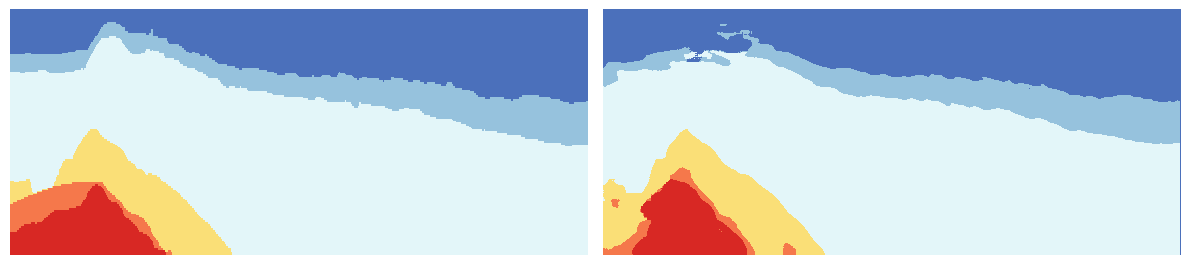

In [8]:
idx = random.randint(0, len(test_dataset))

instancia = test_dataset[idx]

data_teste, mask_teste = instancia['image'], instancia['mask']

fig, axs = plt.subplots(1, 2, figsize=(12, 4))

model.eval()
with torch.no_grad():
    data_teste = data_teste.unsqueeze(0).to(device).float()
    mask_pred = model(data_teste)
    mask_pred = mask_pred.squeeze(0).cpu()
    mask_pred = torch.argmax(mask_pred, dim=0)

axs[0].imshow(mask_teste, cmap=cmap)
axs[1].imshow(mask_pred, cmap=cmap)

# Remove the axis labels
for ax in axs:
    ax.axis('off')

plt.tight_layout()
plt.show()


In [16]:
from torchmetrics.classification import MulticlassJaccardIndex, MulticlassF1Score

IoU = MulticlassJaccardIndex(num_classes=model.n_classes).to(device=device)
F1_score = MulticlassF1Score(num_classes=model.n_classes).to(device=device)

torch.Size([1, 2, 255, 701]) (255, 701) torch.Size([255, 701])
torch.Size([1, 2, 255, 701]) (255, 701) torch.Size([255, 701])


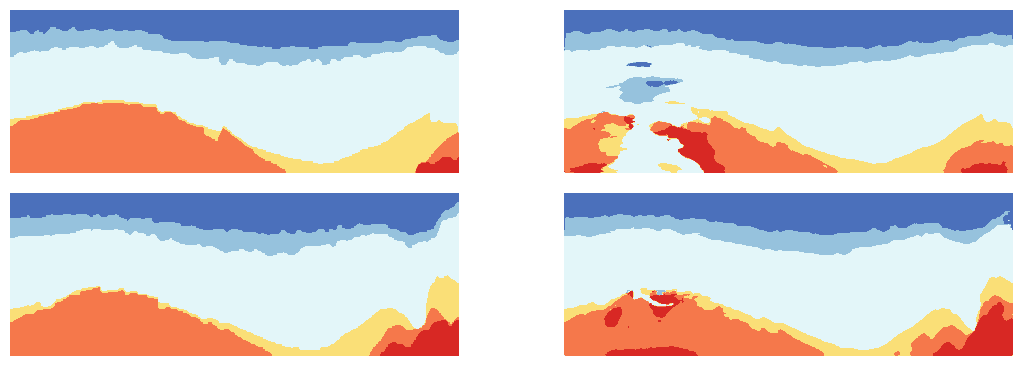

In [43]:
from utils import get_input_data, load_image
import numpy as np
import torch

cp_num = 120
# model.load_state_dict(torch.load(f'checkpoints/checkpoint{cp_num}.pth', map_location=device))
# model_teste = EfficientUnet(n_classes=6).to(device)
# model_teste.load_state_dict(torch.load(f'checkpoints/checkpoint{cp_num}.pth', map_location=device))

il_list = [32, 109]
masks = []
preds = []
lista = []
fig, axs = plt.subplots(len(il_list), 2, figsize=(12, 4))

for i, il in enumerate(il_list):
    data_path = 'data/images/test/il_{}.tif'.format(il)
    mask_path = 'data/annotations/test/il_{}.png'.format(il)
    
    data_teste = get_input_data(data_path)
    mask_teste = load_image(mask_path)
    data_teste = torch.tensor(data_teste).unsqueeze(0).to(device).permute(0, 3, 1, 2).float()
    
    mask_pred = model(data_teste)
    mask_pred = mask_pred.squeeze(0).cpu()
    mask_pred = torch.argmax(mask_pred, dim=0)[:mask_teste.shape[0], :mask_teste.shape[1]]
    print(data_teste.shape, mask_teste.shape, mask_pred.shape)
    
    difference = np.where(mask_teste == np.array(mask_pred), 1, 0)    
    
    axs[i, 0].imshow(mask_teste, cmap=cmap)
    axs[i, 1].imshow(mask_pred, cmap=cmap)
    # axs[i, 1].set_title('Inline {}'.format(il))
    # axs[i, 2].imshow(difference, cmap='gray')
    plt.tight_layout()

    for ax in axs[i]:
        ax.axis('off')
    
    lista.append(difference)
    masks.append(mask_teste)
    preds.append(mask_pred)


(-0.5, 700.5, 254.5, -0.5)

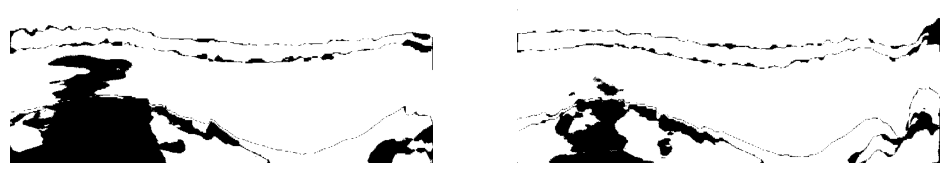

In [28]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].imshow(lista[0], cmap='grey')
axs[1].imshow(lista[1], cmap='grey')
axs[0].axis('off')
axs[1].axis('off')

In [45]:
for i, img in enumerate(preds):
    iou = IoU(img.unsqueeze(0).to(device), torch.tensor(masks[i]).unsqueeze(0).to(device))
    f1 = F1_score(img.unsqueeze(0).to(device), torch.tensor(masks[i]).unsqueeze(0).to(device))
    print(f'Inline {il_list[i]} -> IoU: {iou:.2f}; F1: {f1:.2f}')

Inline 32 -> IoU: 0.60; F1: 0.71
Inline 109 -> IoU: 0.78; F1: 0.86


In [49]:
test_dataset = BasicDataset(test_dir, test_mask_dir, augmentation=False)
teste_dl = torch.utils.data.DataLoader(test_dataset, batch_size=1, shuffle=False, pin_memory=True)

INFO: Creating dataset with 400 examples
INFO: Scanning mask files to determine unique values
100%|██████████| 400/400 [00:00<00:00, 3967.89it/s]
INFO: Unique mask values: [0, 1, 2, 3, 4, 5]


In [50]:
from evaluate import evaluate_model

iou, f1, loss = evaluate_model(model, teste_dl, device, window=False)
iou, f1, loss

(0.7019853591918945, 0.7769295573234558, 0.09916664659976959)